In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
plt.rcParams['font.sans-serif'] = ['SimHei']


In [197]:
# 重新定义文件路径
data = pd.read_excel('E:\\数学建模国赛\\2022数学建模赛题\\C题\\一二表单合并数据.xlsx')
data

,Unnamed: 0,类型,表面风化,文物采样点,SiO2,Na2O,K2O,CaO,MgO,Al2O3,Fe2O3,CuO,PbO,BaO,P2O5,SrO,SnO2,SO2
0,0,高钾,无风化,01,71.027559,0.000000,10.234607,6.474746,0.891302,4.026227,1.782604,3.964758,0.000000,0.000000,1.198648,0.000000,0.0,0.399549
1,1,铅钡,风化,02,36.319952,0.000000,1.051156,2.342577,1.181299,5.736310,1.862048,0.260286,47.482230,0.000000,3.573931,0.190209,0.0,0.000000
2,2,高钾,无风化,03部位1,87.050000,0.000000,5.190000,2.010000,0.000000,4.060000,0.000000,0.780000,0.250000,0.000000,0.660000,0.000000,0.0,0.000000
3,3,高钾,无风化,03部位2,62.408981,0.000000,12.510113,5.936489,1.122573,5.562298,2.184466,5.147654,1.425971,2.892395,0.707929,0.101133,0.0,0.000000
4,4,高钾,无风化,04,68.582136,0.000000,10.066625,7.412034,1.623985,6.704143,2.144493,2.269415,0.000000,0.000000,0.822403,0.000000,0.0,0.374766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,62,铅钡,风化,54严重风化点,17.653735,0.000000,0.000000,0.000000,1.145274,3.765993,0.000000,1.382584,60.317788,0.000000,14.579034,1.155592,0.0,0.000000
63,63,铅钡,无风化,55,50.850799,2.811787,0.000000,1.172442,0.000000,1.504462,0.000000,0.892301,34.156464,8.248599,0.363146,0.000000,0.0,0.000000
64,64,铅钡,风化,56,31.602342,0.000000,0.000000,1.311795,0.000000,2.005637,0.000000,0.856461,44.720295,16.749783,2.753686,0.000000,0.0,0.000000
65,65,铅钡,风化,57,27.489997,0.000000,0.000000,1.416676,0.000000,2.357521,0.000000,1.254461,48.772575,18.708770,0.000000,0.000000,0.0,0.000000


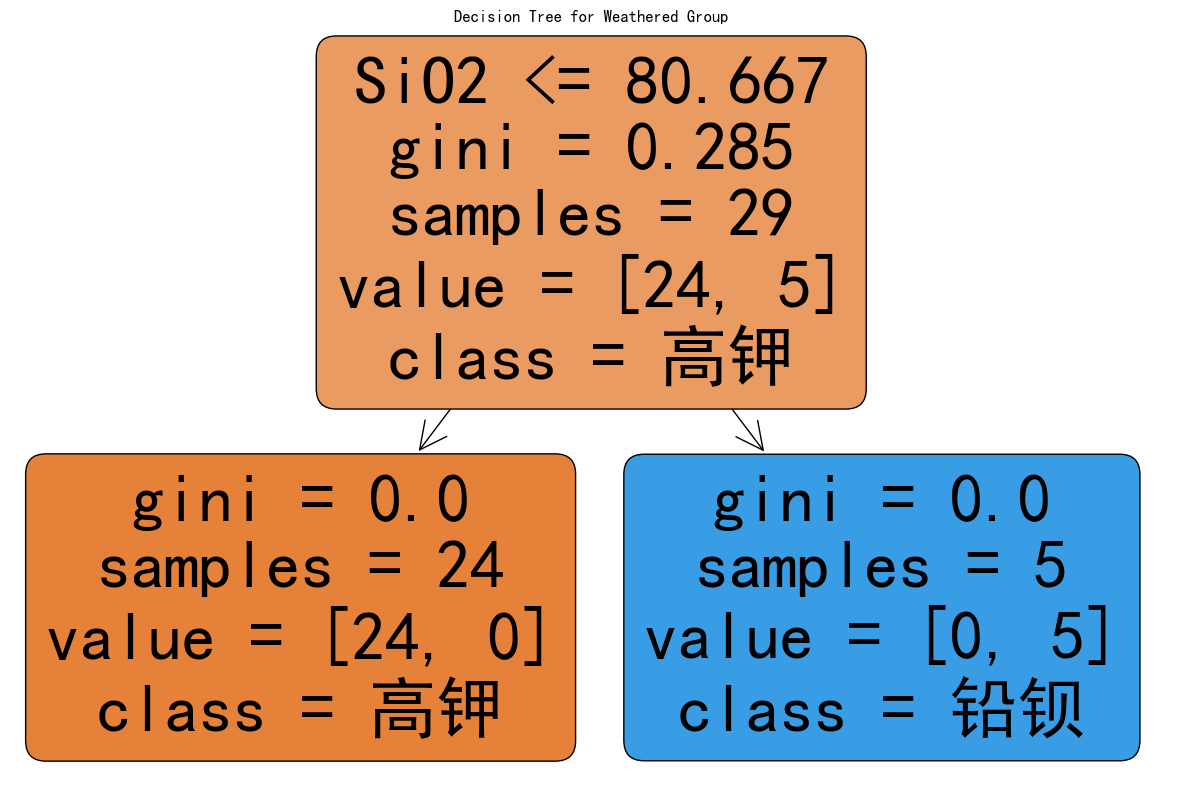

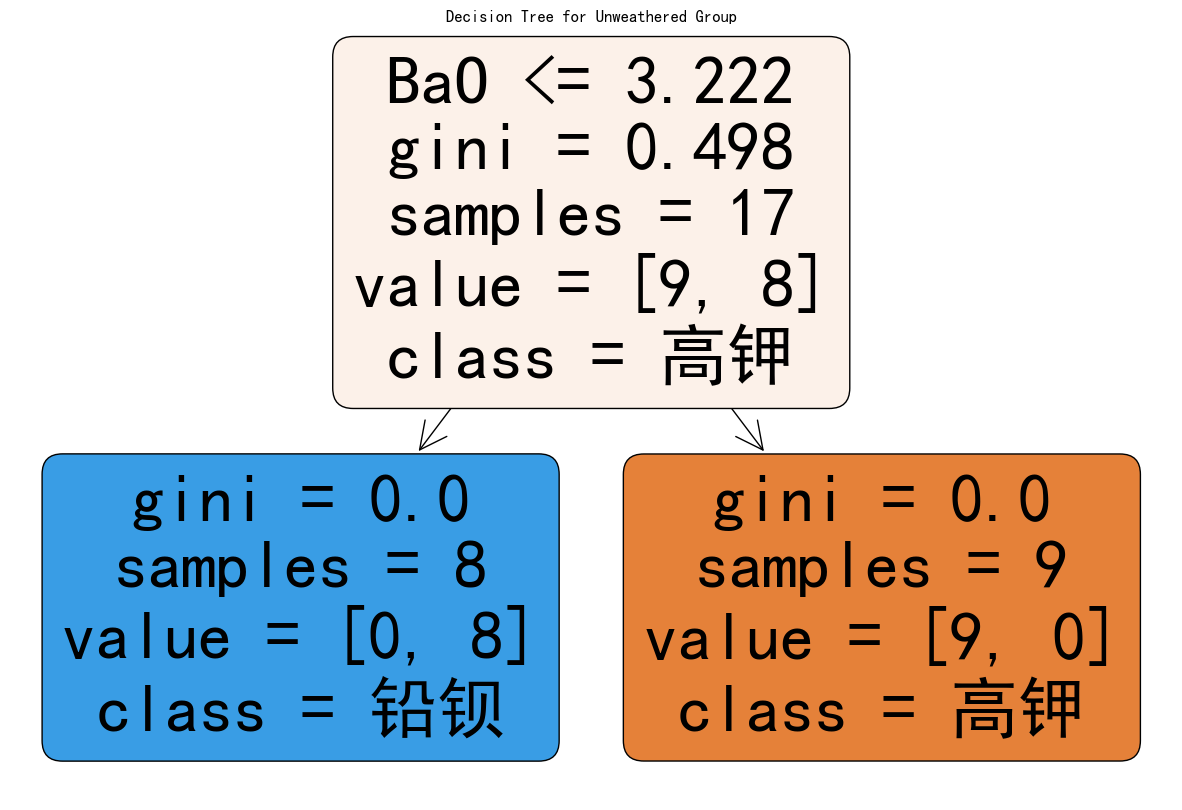

({'精确率': 1.0, '召回率': 1.0, '准确率': 1.0, 'F1系数': 1.0},
 {'精确率': 1.0, '召回率': 1.0, '准确率': 1.0, 'F1系数': 1.0},
 {'精确率': 1.0, '召回率': 1.0, '准确率': 1.0, 'F1系数': 1.0},
 {'精确率': 1.0, '召回率': 1.0, '准确率': 1.0, 'F1系数': 1.0})

In [2]:
# 删除 "Unnamed: 0" 列
data.drop(columns=['Unnamed: 0'], inplace=True)

# 定义一个通用函数来处理风化或未风化组的数据
def process_group(data, group_condition, group_name):
    # 分组
    group_data = data[data['表面风化'] == group_condition]

    # 定义特征和目标变量
    X = group_data.drop(columns=['类型', '表面风化', '文物采样点'])
    y = group_data['类型']

    # 划分训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # 创建决策树模型并训练
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)

    # 预测
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    # 计算评估指标
    metrics_train = {
        '精确率': precision_score(y_train, y_pred_train, average='macro'),
        '召回率': recall_score(y_train, y_pred_train, average='macro'),
        '准确率': accuracy_score(y_train, y_pred_train),
        'F1系数': f1_score(y_train, y_pred_train, average='macro')
    }

    metrics_test = {
        '精确率': precision_score(y_test, y_pred_test, average='macro'),
        '召回率': recall_score(y_test, y_pred_test, average='macro'),
        '准确率': accuracy_score(y_test, y_pred_test),
        'F1系数': f1_score(y_test, y_pred_test, average='macro')
    }

    # 可视化决策树
    plt.figure(figsize=(15, 10))
    plot_tree(clf, feature_names=X.columns, class_names=['高钾', '铅钡'], filled=True, rounded=True)
    plt.title(f"Decision Tree for {group_name} Group")
    plt.show()

    return metrics_train, metrics_test

# 对风化组的数据进行处理
weathered_metrics_train, weathered_metrics_test = process_group(data, '风化', 'Weathered')

# 对未风化组的数据进行处理
unweathered_metrics_train, unweathered_metrics_test = process_group(data, '无风化', 'Unweathered')

weathered_metrics_train, weathered_metrics_test, unweathered_metrics_train, unweathered_metrics_test

In [ ]:
左False，右True

In [3]:
data

,类型,表面风化,文物采样点,SiO2,Na2O,K2O,CaO,MgO,Al2O3,Fe2O3,CuO,PbO,BaO,P2O5,SrO,SnO2,SO2
0,高钾,无风化,01,71.027559,0.000000,10.234607,6.474746,0.891302,4.026227,1.782604,3.964758,0.000000,0.000000,1.198648,0.000000,0.0,0.399549
1,铅钡,风化,02,36.319952,0.000000,1.051156,2.342577,1.181299,5.736310,1.862048,0.260286,47.482230,0.000000,3.573931,0.190209,0.0,0.000000
2,高钾,无风化,03部位1,87.050000,0.000000,5.190000,2.010000,0.000000,4.060000,0.000000,0.780000,0.250000,0.000000,0.660000,0.000000,0.0,0.000000
3,高钾,无风化,03部位2,62.408981,0.000000,12.510113,5.936489,1.122573,5.562298,2.184466,5.147654,1.425971,2.892395,0.707929,0.101133,0.0,0.000000
4,高钾,无风化,04,68.582136,0.000000,10.066625,7.412034,1.623985,6.704143,2.144493,2.269415,0.000000,0.000000,0.822403,0.000000,0.0,0.374766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,铅钡,风化,54严重风化点,17.653735,0.000000,0.000000,0.000000,1.145274,3.765993,0.000000,1.382584,60.317788,0.000000,14.579034,1.155592,0.0,0.000000
63,铅钡,无风化,55,50.850799,2.811787,0.000000,1.172442,0.000000,1.504462,0.000000,0.892301,34.156464,8.248599,0.363146,0.000000,0.0,0.000000
64,铅钡,风化,56,31.602342,0.000000,0.000000,1.311795,0.000000,2.005637,0.000000,0.856461,44.720295,16.749783,2.753686,0.000000,0.0,0.000000
65,铅钡,风化,57,27.489997,0.000000,0.000000,1.416676,0.000000,2.357521,0.000000,1.254461,48.772575,18.708770,0.000000,0.000000,0.0,0.000000


In [186]:
# 分组数据
groups = {
    "铅钡风化": data[(data["类型"] == "铅钡") & (data["表面风化"] == "风化")],
    "铅钡不风化": data[(data["类型"] == "铅钡") & (data["表面风化"] == "无风化")],
    "高钾风化": data[(data["类型"] == "高钾") & (data["表面风化"] == "风化")],
    "高钾不风化": data[(data["类型"] == "高钾") & (data["表面风化"] == "无风化")],
}

# 显示其中一组的概览
groups["铅钡风化"].head()


,类型,表面风化,文物采样点,SiO2,Na2O,K2O,CaO,MgO,Al2O3,Fe2O3,CuO,PbO,BaO,P2O5,SrO,SnO2,SO2
1,铅钡,风化,02,36.319952,0.0,1.051156,2.342577,1.181299,5.736310,1.862048,0.260286,47.482230,0.000000,3.573931,0.190209,0.0,0.000000
9,铅钡,风化,08,20.176317,0.0,0.000000,1.482669,0.000000,1.342416,0.000000,10.428772,28.731717,31.286315,3.596474,0.370667,0.0,2.584652
10,铅钡,风化,08严重风化点,4.692590,0.0,0.000000,3.247150,0.000000,1.129886,0.000000,3.196254,33.031352,31.168567,7.695440,0.539495,0.0,15.299267
13,铅钡,风化,11,35.213335,0.0,0.220149,3.679631,0.744313,2.820002,0.000000,5.168257,26.617046,15.316071,9.833316,0.387881,0.0,0.000000
19,铅钡,风化,19,30.012151,0.0,0.000000,2.966788,0.597408,3.614824,1.346699,3.554070,43.357635,5.417173,8.940867,0.192386,0.0,0.000000


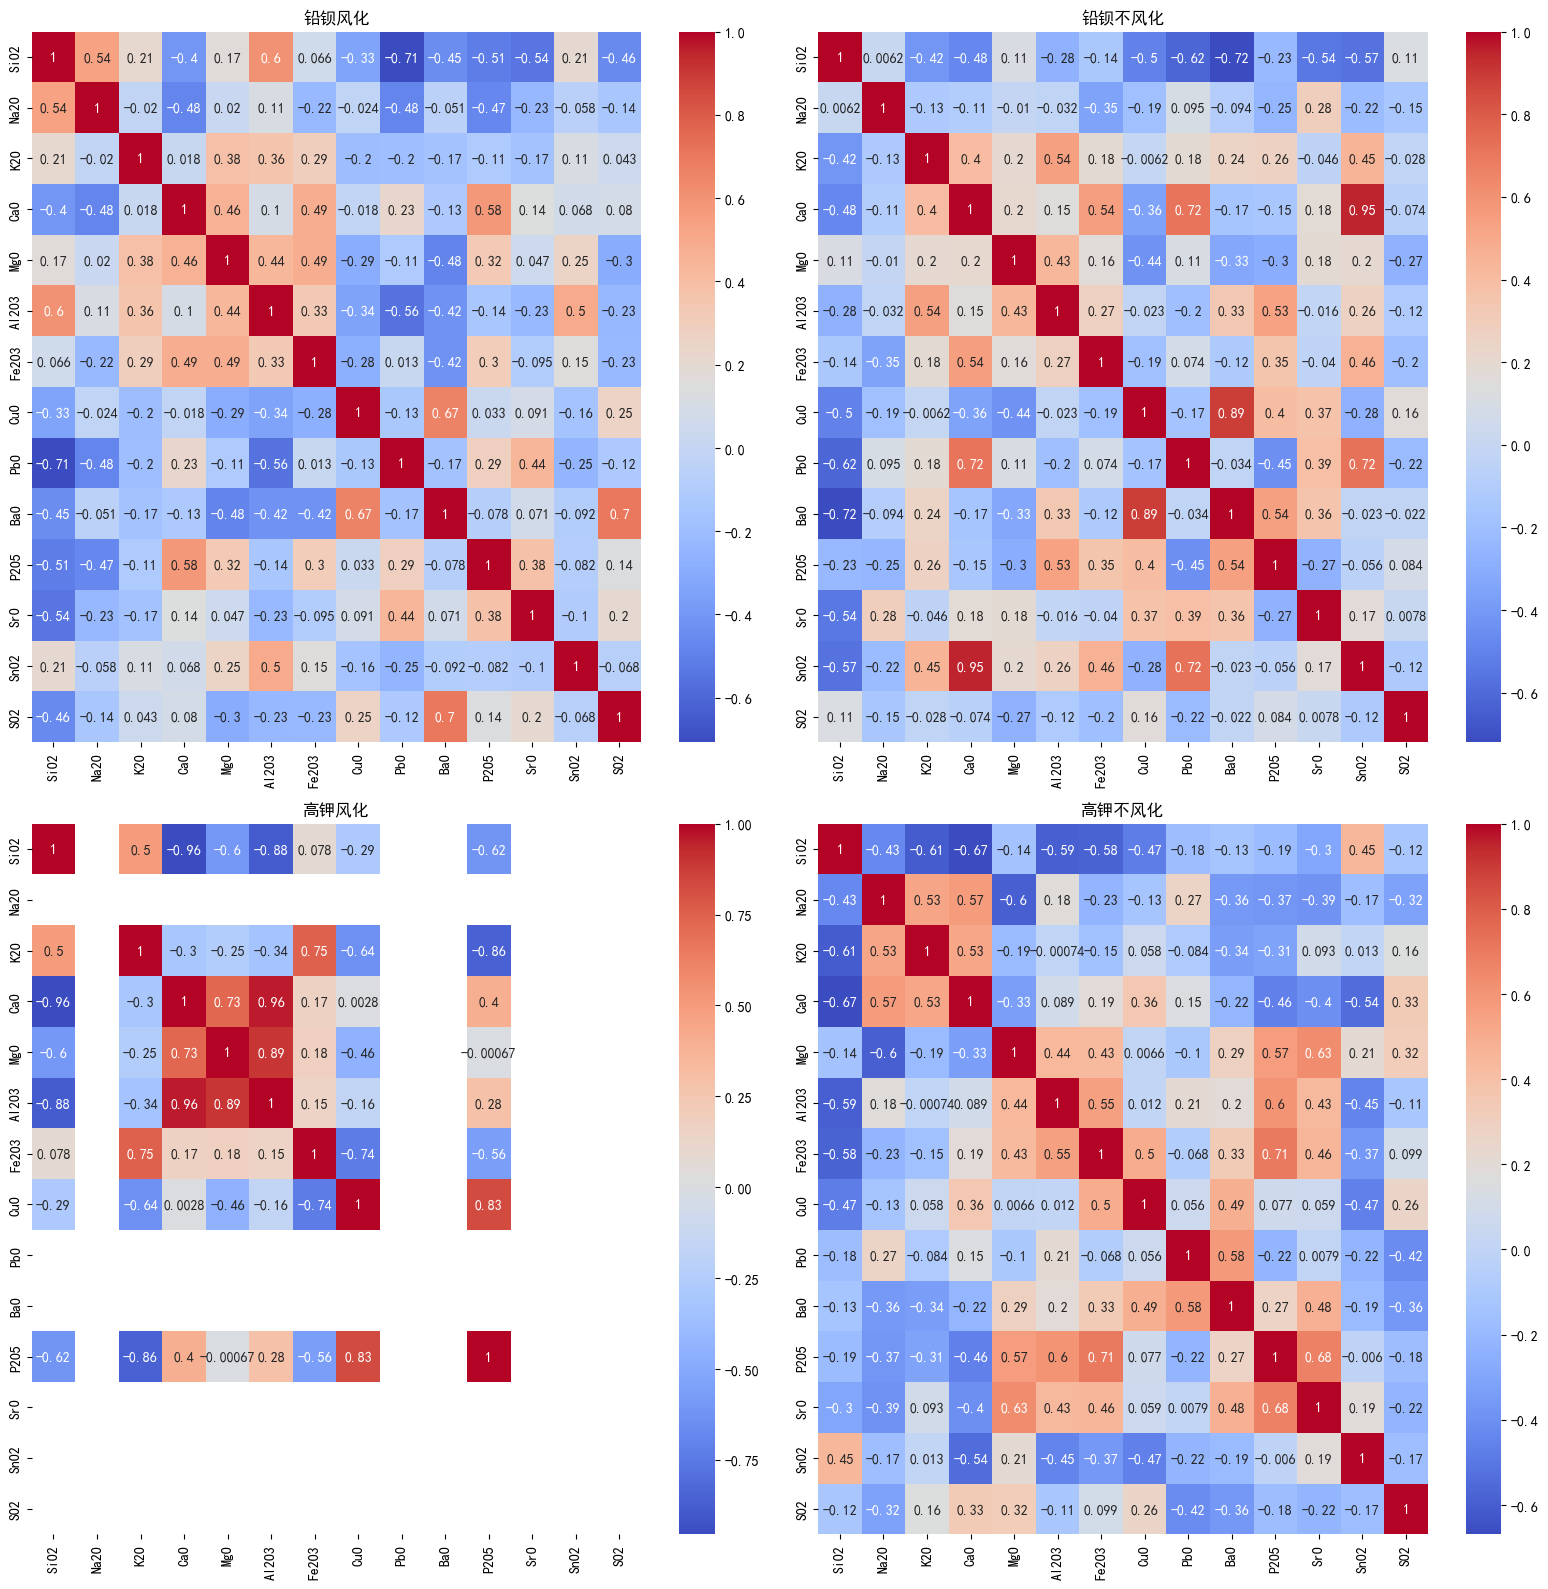

In [187]:
import seaborn as sns

def visualize_correlation_matrices(groups):
    fig, axes = plt.subplots(2, 2, figsize=(16, 16))
    axes = axes.flatten()

    for i, (group_name, group_data) in enumerate(groups.items()):
        # 提取化学成分
        chemical_data_group = group_data.drop(columns=['类型', '表面风化', '文物采样点'])

        # 计算皮尔逊相关系数矩阵
        correlation_matrix = chemical_data_group.corr()

        # 使用seaborn可视化相关系数矩阵
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=axes[i])
        axes[i].set_title(group_name)

    plt.tight_layout()
    plt.show()

# 调用函数可视化每一组的相关系数矩阵
visualize_correlation_matrices(groups)


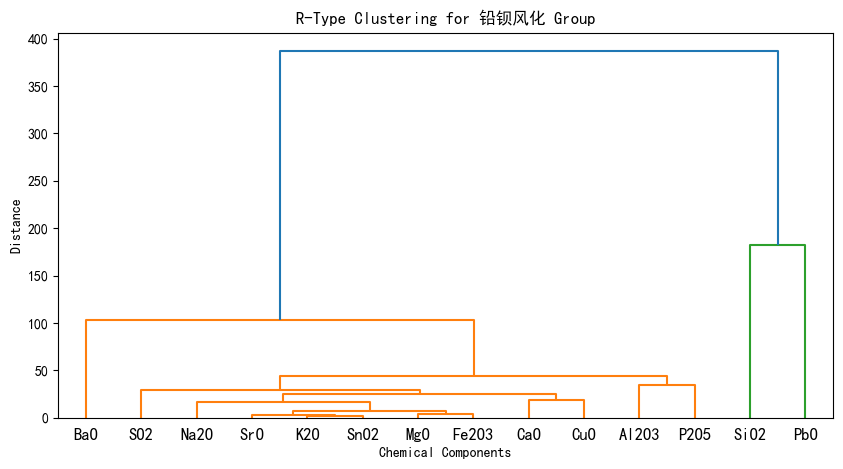

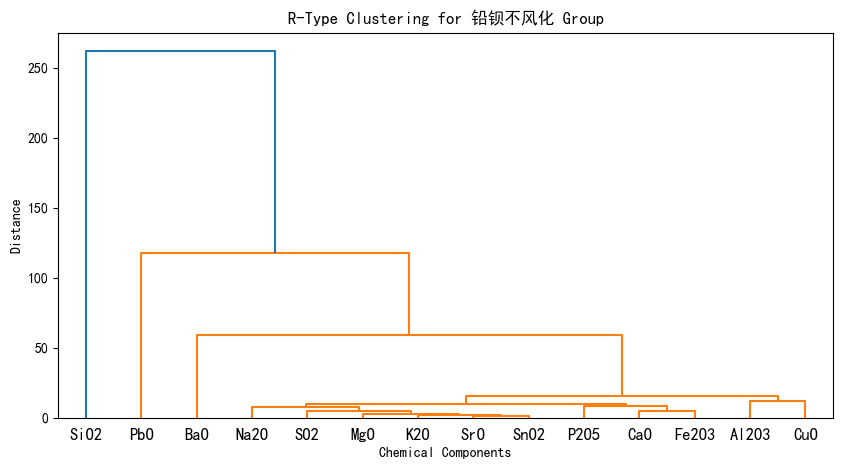

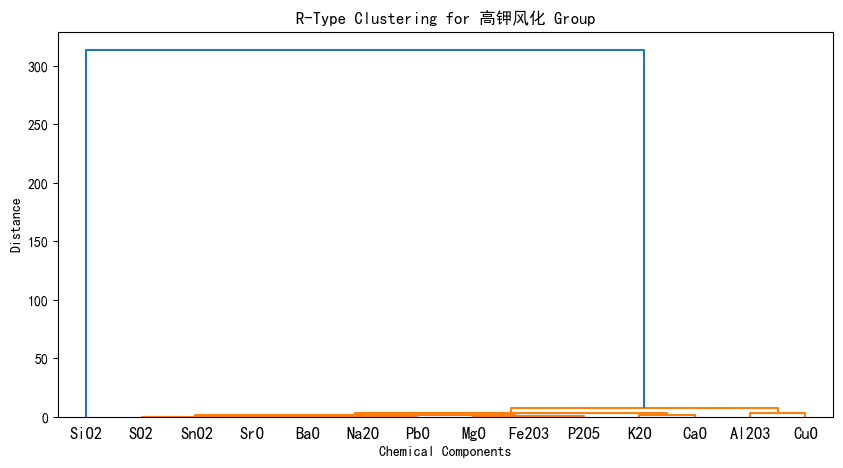

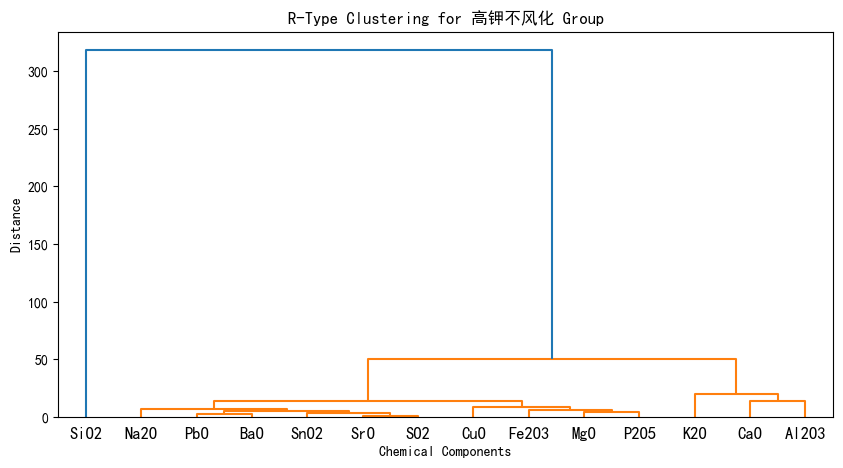

In [17]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

# 选择化学成分列
chemical_columns = ['SiO2', 'Na2O', 'K2O', 'CaO', 'MgO', 'Al2O3', 'Fe2O3', 'CuO', 'PbO', 'BaO', 'P2O5', 'SrO', 'SnO2', 'SO2']

# R型聚类分析并绘制树状图的函数
def perform_r_clustering(group_data, title):
    # 进行层次聚类
    Z = linkage(group_data.T, method='ward')

    # 绘制树状图
    plt.figure(figsize=(10, 5))
    dendrogram(Z, labels=chemical_columns)
    plt.title(title)
    plt.xlabel('Chemical Components')
    plt.ylabel('Distance')
    plt.show()
    return Z

# 对每组数据执行R型聚类
r_clustering_results = {}
for group_name, group_data in groups.items():
    r_clustering_results[group_name] = perform_r_clustering(group_data[chemical_columns], f'R-Type Clustering for {group_name} Group')


In [18]:
# 选择距离中心最近的化学成分的函数，传入组数据
def select_closest_to_center_chemicals(group_data):
    # 进行层次聚类
    Z = linkage(group_data.T, method='ward')
    
    # 使用截断距离进行聚类，得到每个化学成分的类别标签
    cluster_labels = fcluster(Z, t=3, criterion='maxclust')
    
    # 计算所有化学成分之间的距离
    distances = squareform(pdist(group_data.T))
    
    # 创建代表性化学成分列表
    closest_chemicals = []
    
    # 对每个类别，选择距离中心最近的化学成分作为代表
    for cluster_num in range(1, 4):
        cluster_chemicals_indices = [index for index, label in enumerate(cluster_labels) if label == cluster_num]
        cluster_distances = distances[cluster_chemicals_indices][:, cluster_chemicals_indices]
        avg_distances = cluster_distances.mean(axis=1)
        closest_chemical_index = cluster_chemicals_indices[np.argmin(avg_distances)]
        closest_chemicals.append(chemical_columns[closest_chemical_index])
    
    return closest_chemicals

# 选择每组数据的距离中心最近的化学成分
closest_chemicals_by_group = {group_name: select_closest_to_center_chemicals(group_data[chemical_columns]) for group_name, group_data in groups.items()}
closest_chemicals_by_group


{'铅钡风化': ['MgO', 'SiO2', 'PbO'],
 '铅钡不风化': ['SrO', 'PbO', 'SiO2'],
 '高钾风化': ['Na2O', 'Al2O3', 'SiO2'],
 '高钾不风化': ['PbO', 'CaO', 'SiO2']}

D:\py1.1\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\py1.1\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\py1.1\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\py1.1\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

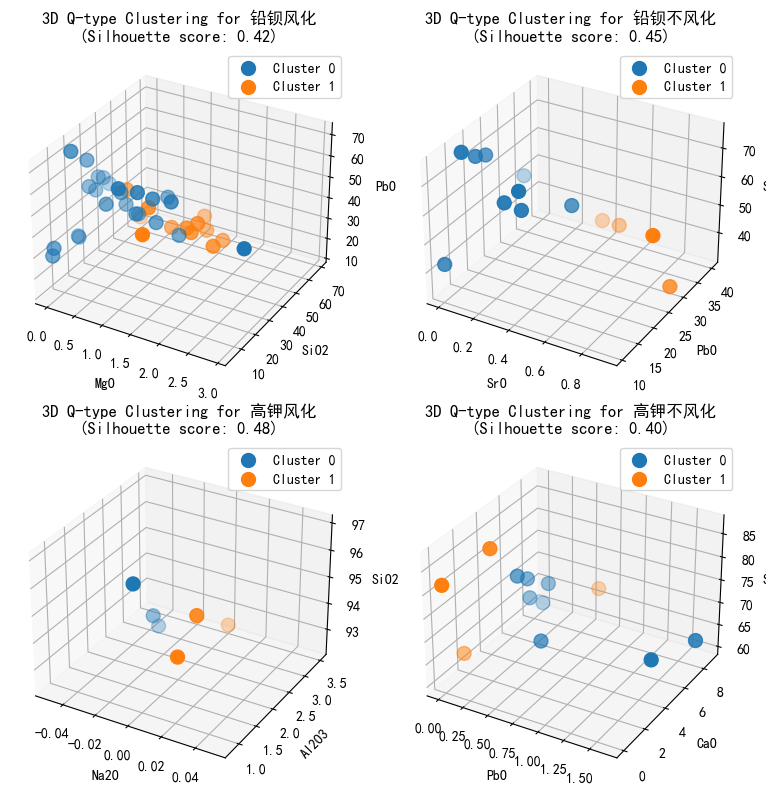

In [45]:
def perform_q_clustering_3d_subplots(groups, selected_chemicals_by_group, n_clusters=2):
    q_clustering_results = {}
    
    fig = plt.figure(figsize=(8, 8))

    for idx, (group_name, group_data) in enumerate(groups.items()):
        # 选择指定的化学成分
        selected_chemicals = selected_chemicals_by_group[group_name]
        selected_data = group_data[selected_chemicals]

        # 标准化数据
        scaler = StandardScaler()
        standardized_data = scaler.fit_transform(selected_data)

        # 执行K均值聚类
        kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)  # 显式设置 n_init 参数
        clusters = kmeans.fit_predict(standardized_data)
    
        # 计算轮廓系数
        silhouette_avg = silhouette_score(standardized_data, clusters)

        # 将聚类结果存储在字典中
        q_clustering_results[group_name] = {
            'clusters': clusters,
            'silhouette_avg': silhouette_avg
        }

        # 绘制3D散点图
        ax = fig.add_subplot(2, 2, idx + 1, projection='3d')
        for cluster in range(n_clusters):
            cluster_points = selected_data[clusters == cluster]
            ax.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], cluster_points.iloc[:, 2], s=100, label=f'Cluster {cluster}')
        ax.set_title(f"3D Q-type Clustering for {group_name}\n(Silhouette score: {silhouette_avg:.2f})")
        ax.set_xlabel(selected_chemicals[0])
        ax.set_ylabel(selected_chemicals[1])
        ax.set_zlabel(selected_chemicals[2])
        ax.legend()

    plt.tight_layout()
    plt.show()
    
    return q_clustering_results

# 重新执行Q型聚类分析并绘制三维结果
q_clustering_results_closest_3d_subplots = perform_q_clustering_3d_subplots(groups, closest_chemicals_by_group)


In [184]:
"""
在 K-Means 聚类分析中，轮廓系数（Silhouette score）是一种用于评估聚类效果的度量指标。它的值范围从 -1 到 1。

轮廓系数接近 1：表示样本与其所在的簇内其他样本的相似度很高，与其他簇的相似度很低。这是一种理想的情况，表示聚类效果很好。
轮廓系数接近 0：表示样本与其所在的簇内其他样本的相似度与与其他簇的相似度相近。这意味着该样本可能在簇之间的边界上，聚类效果一般。
轮廓系数小于 0：表示样本与其他簇的样本更相似，而不是与其所在的簇内的样本相似。这可能是聚类效果不理想的迹象。
在您提到的情况下，轮廓系数为 0.45，表示聚类效果中等。样本大部分正确地分配到了适当的簇中，但仍然有一些样本可能被错误分配。
"""

'\n在 K-Means 聚类分析中，轮廓系数（Silhouette score）是一种用于评估聚类效果的度量指标。它的值范围从 -1 到 1。\n\n轮廓系数接近 1：表示样本与其所在的簇内其他样本的相似度很高，与其他簇的相似度很低。这是一种理想的情况，表示聚类效果很好。\n轮廓系数接近 0：表示样本与其所在的簇内其他样本的相似度与与其他簇的相似度相近。这意味着该样本可能在簇之间的边界上，聚类效果一般。\n轮廓系数小于 0：表示样本与其他簇的样本更相似，而不是与其所在的簇内的样本相似。这可能是聚类效果不理想的迹象。\n在您提到的情况下，轮廓系数为 0.45，表示聚类效果中等。样本大部分正确地分配到了适当的簇中，但仍然有一些样本可能被错误分配。\n'

In [71]:
import os

os.environ['OMP_NUM_THREADS'] = '1'


In [182]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def sensitivity_analysis(groups, selected_chemicals_by_group, n_clusters=2):
    max_disturbances = {}

    for group_name, group_data in groups.items():
        print(f"Analyzing group: {group_name}")

        # 选择指定的化学成分
        selected_chemicals = selected_chemicals_by_group[group_name]
        selected_data = group_data[selected_chemicals]

        # 标准化数据
        scaler = StandardScaler()
        standardized_data = scaler.fit_transform(selected_data)

        # 执行初始K均值聚类
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        initial_clusters = kmeans.fit_predict(standardized_data)

        max_disturbances[group_name] = {}

        # 对每个化学成分进行扰动分析
        for chemical in selected_chemicals:
            max_disturbance = 0
            for disturbance_range in [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]:
                # 应用扰动
                disturbed_data = selected_data.copy()
                disturbance_factor = np.random.uniform(1 - disturbance_range, 1 + disturbance_range, size=len(selected_data))
                disturbed_data[chemical] *= disturbance_factor

                # 重新聚类
                standardized_disturbed_data = scaler.transform(disturbed_data)
                disturbed_clusters = kmeans.fit_predict(standardized_disturbed_data)

                # 检查分类结果是否相同
                if np.all(initial_clusters == disturbed_clusters):
                    max_disturbance = disturbance_range
                else:
                    break

            max_disturbances[group_name][chemical] = max_disturbance
            print(f"Max disturbance for {chemical}: {max_disturbance}")

    return max_disturbances

# 运行敏感性分析
max_disturbances = sensitivity_analysis(groups, closest_chemicals_by_group)

Analyzing group: 铅钡风化
Max disturbance for MgO: 0.3
Max disturbance for SiO2: 0.1
Max disturbance for PbO: 0.05
Analyzing group: 铅钡不风化
Max disturbance for SrO: 0.15
Max disturbance for PbO: 0.05
Max disturbance for SiO2: 0.05
Analyzing group: 高钾风化


D:\py1.1\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\py1.1\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\py1.1\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\py1.1\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable 

D:\py1.1\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\py1.1\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\py1.1\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\py1.1\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable 

Max disturbance for Na2O: 0.3
Max disturbance for Al2O3: 0.25
Max disturbance for SiO2: 0.05
Analyzing group: 高钾不风化
Max disturbance for PbO: 0.3
Max disturbance for CaO: 0.2
Max disturbance for SiO2: 0.1


In [183]:
max_disturbances

{'铅钡风化': {'MgO': 0.3, 'SiO2': 0.1, 'PbO': 0.05},
 '铅钡不风化': {'SrO': 0.15, 'PbO': 0.05, 'SiO2': 0.05},
 '高钾风化': {'Na2O': 0.3, 'Al2O3': 0.25, 'SiO2': 0.05},
 '高钾不风化': {'PbO': 0.3, 'CaO': 0.2, 'SiO2': 0.1}}